In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# READ DATA

In [ ]:
df=pd.read_csv('root_cause_analysis.csv')
df.sample(5)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
527,528,1,1,0,0,1,0,1,MEMORY
532,533,1,0,0,0,0,0,0,DATABASE_ISSUE
34,35,0,0,0,0,0,0,1,MEMORY
990,991,1,1,0,1,1,1,0,DATABASE_ISSUE
101,102,0,1,0,1,0,1,1,MEMORY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1000 non-null   int64 
 1   CPU_LOAD     1000 non-null   int64 
 2   MEMORY_LOAD  1000 non-null   int64 
 3   DELAY        1000 non-null   int64 
 4   ERROR_1000   1000 non-null   int64 
 5   ERROR_1001   1000 non-null   int64 
 6   ERROR_1002   1000 non-null   int64 
 7   ERROR_1003   1000 non-null   int64 
 8   ROOT_CAUSE   1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [ ]:
for i in df.columns:
    print(i,"column's total unique values are:",df[i].nunique())

ID column's total unique values are: 1000
CPU_LOAD column's total unique values are: 2
MEMORY_LOAD column's total unique values are: 2
DELAY column's total unique values are: 2
ERROR_1000 column's total unique values are: 2
ERROR_1001 column's total unique values are: 2
ERROR_1002 column's total unique values are: 2
ERROR_1003 column's total unique values are: 2
ROOT_CAUSE column's total unique values are: 3


In [ ]:
num=df.select_dtypes(include='int64').columns
num

Index(['ID', 'CPU_LOAD', 'MEMORY_LOAD', 'DELAY', 'ERROR_1000', 'ERROR_1001',
       'ERROR_1002', 'ERROR_1003'],
      dtype='object')

In [ ]:
cat=df.select_dtypes(include='object').columns
cat

Index(['ROOT_CAUSE'], dtype='object')

# Exploratory Data Analysis

In [ ]:
df[num].describe()

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.472000,0.418000,0.394000,0.395000,0.485000,0.432000,0.381000
std,288.819436,0.499465,0.493477,0.488879,0.489095,0.500025,0.495602,0.485876
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[cat].describe()

,ROOT_CAUSE
count,1000
unique,3
top,DATABASE_ISSUE
freq,340


In [ ]:
print('value_unique_target:',df['ROOT_CAUSE'].unique())
print('jumlah_value_unique_MEMORY:',df[df['ROOT_CAUSE']=='MEMORY']['ROOT_CAUSE'].count())
print('jumlah_value_unique_NETWORK_DELAY:',df[df['ROOT_CAUSE']=='NETWORK_DELAY']['ROOT_CAUSE'].count())
print('jumlah_value_unique_DATABASE_ISSUE:',df[df['ROOT_CAUSE']=='DATABASE_ISSUE']['ROOT_CAUSE'].count())

value_unique_target: ['MEMORY' 'NETWORK_DELAY' 'DATABASE_ISSUE']
jumlah_value_unique_MEMORY: 323
jumlah_value_unique_NETWORK_DELAY: 337
jumlah_value_unique_DATABASE_ISSUE: 340


Kesimpulan target dalam keadaan balance dengan persentase perbandingan 32.3% : 33.7% : 34%

<AxesSubplot:>

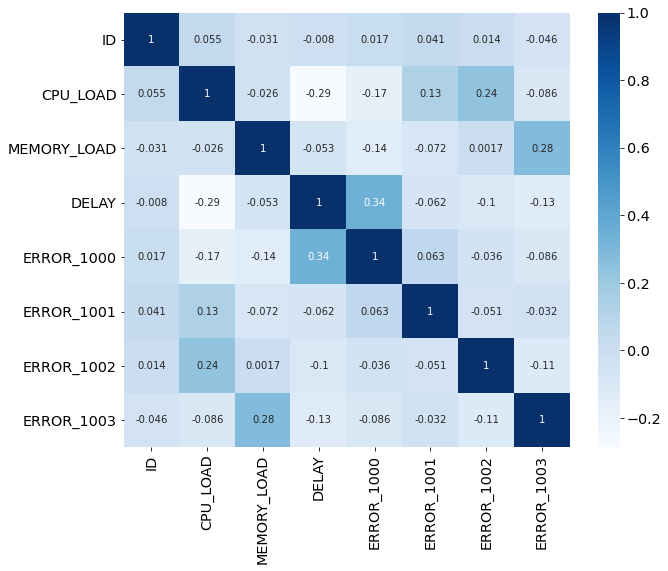

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Correlation result:
<br>ERROR_1000 -> delay (0.34)
<br>ERROR_1001 -> CPU LOAD (0.13)
<br>ERROR_1002 -> CPU LOAD (0.24)
<br>ERROR_1003 -> MEMORY LOAD (0.28)

# FEATURE ENGINEERING

In [ ]:
#Feature Encoding for Target using label Encoding
df_model = df.copy()
df_model['ROOT_CAUSE_ENC'] = df_model['ROOT_CAUSE'].astype('category').cat.codes
df_model.sample(5)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE,ROOT_CAUSE_ENC
949,950,0,1,0,0,0,0,1,MEMORY,1
340,341,1,0,0,0,1,0,1,NETWORK_DELAY,2
24,25,0,0,1,1,1,0,0,NETWORK_DELAY,2
182,183,1,1,0,0,1,1,0,DATABASE_ISSUE,0
539,540,1,1,0,0,1,1,1,MEMORY,1


Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Drop feature ROOT_CAUSE dan ID
df_final = df_model.drop(['ID','ROOT_CAUSE'], axis=1)

In [ ]:
df_final.sample(5)

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE_ENC
136,1,0,0,0,1,0,0,0
116,0,1,0,0,0,0,0,1
800,1,0,0,1,1,1,0,0
10,1,0,0,0,0,0,1,1
325,0,1,0,0,0,1,1,1


# MODELING

In [ ]:
#Separate Feature & Target
x = df_final.drop(columns=['ROOT_CAUSE_ENC']) #Menggunakan semua feature kecuali Target
y = df_final['ROOT_CAUSE_ENC'] # target / label

## Logistic-Regression

### Fitting & Predict Model

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

### Evaluation

In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.83
Precision (Test Set): 0.82
Precision (Train Set): 0.83
Recall (Test Set): 0.81
Recall (Train Set): 0.83


No indication result overfitting

In [ ]:
#Test, soure -> https://www.kaggle.com/gizemtanriver/multi-class-classification-by-decision-tree (evaluation metric perclass)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       131
           1       0.83      0.72      0.77       134
           2       0.82      0.92      0.87       135

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       209
           1       0.83      0.77      0.80       189
           2       0.82      0.90      0.86       202

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



### Result Predict with All Origin Data

In [ ]:
y_true = np.array(df_final['ROOT_CAUSE_ENC'])
y_pred_ori = lr.predict(x)

In [ ]:
#Evaluation->https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 (all class)
print("Accuracy (Origin Data): %.2f" % accuracy_score(y_true, y_pred_ori))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred_ori, average='weighted'))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred_ori, average='weighted'))
print("F1-Score (Test Set): %.2f" % f1_score(y_true, y_pred_ori,average='weighted'))

Accuracy (Origin Data): 0.82
Precision (Origin Data): 0.82
Recall (Origin Data): 0.82
F1-Score (Test Set): 0.82


In [ ]:
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred_ori)
cf

array([[275,  39,  26],
       [ 40, 241,  42],
       [ 21,  10, 306]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_ori))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       340
           1       0.83      0.75      0.79       323
           2       0.82      0.91      0.86       337

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



In [ ]:
#Testing with dummy data refered to original data
df.sample(2, random_state=92)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
92,93,0,1,1,0,1,0,1,MEMORY
209,210,0,1,0,0,1,1,0,DATABASE_ISSUE


In [ ]:
#Testing with dummy data refered to original data
dummy = x.sample(2, random_state=92)
dummy

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
92,0,1,1,0,1,0,1
209,0,1,0,0,1,1,0


In [ ]:
y_pred_ori = lr.predict(dummy)
y_pred_ori

array([1, 0], dtype=int8)

Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

## KNN

### Fitting & Predict Model

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

### Evaluation

In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.84
Precision (Test Set): 0.82
Precision (Train Set): 0.85
Recall (Test Set): 0.81
Recall (Train Set): 0.84


No indication result overfitting

In [ ]:
#Test, soure -> https://www.kaggle.com/gizemtanriver/multi-class-classification-by-decision-tree (evaluation metric perclass)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       131
           1       0.78      0.82      0.80       134
           2       0.91      0.84      0.87       135

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       209
           1       0.78      0.89      0.83       189
           2       0.95      0.84      0.89       202

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600



### Result Predict with All Origin Data

In [ ]:
y_true = np.array(df_final['ROOT_CAUSE_ENC'])
y_pred_ori = knn.predict(x)

In [ ]:
#Evaluation->https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 (all class)
print("Accuracy (Origin Data): %.2f" % accuracy_score(y_true, y_pred_ori))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred_ori, average='weighted'))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred_ori, average='weighted'))
print("F1-Score (Test Set): %.2f" % f1_score(y_true, y_pred_ori,average='weighted'))

Accuracy (Origin Data): 0.83
Precision (Origin Data): 0.83
Recall (Origin Data): 0.83
F1-Score (Test Set): 0.83


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred_ori)
cf

array([[268,  65,   7],
       [ 32, 278,  13],
       [ 41,  13, 283]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_ori))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       340
           1       0.78      0.86      0.82       323
           2       0.93      0.84      0.88       337

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



In [ ]:
#Testing with dummy data refered to original data
df.sample(2, random_state=43)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
858,859,1,0,1,1,0,0,0,NETWORK_DELAY
986,987,0,0,1,1,0,0,0,NETWORK_DELAY


In [ ]:
#Testing with dummy data refered to original data
dummy = x.sample(2, random_state=43)
dummy

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
858,1,0,1,1,0,0,0
986,0,0,1,1,0,0,0


In [ ]:
y_pred_ori = knn.predict(dummy)
y_pred_ori

array([2, 2], dtype=int8)

Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

## Decision Tree

### Fitting & Predict Model

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

### Evaluation

In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.87
Precision (Test Set): 0.85
Precision (Train Set): 0.88
Recall (Test Set): 0.85
Recall (Train Set): 0.87


No indication result overfitting

In [ ]:
#Test, soure -> https://www.kaggle.com/gizemtanriver/multi-class-classification-by-decision-tree (evaluation metric perclass)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       131
           1       0.86      0.81      0.83       134
           2       0.90      0.87      0.89       135

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       209
           1       0.86      0.86      0.86       189
           2       0.95      0.87      0.90       202

    accuracy                           0.87       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.88      0.87      0.87       600



### Result Predict with All Origin Data

In [ ]:
y_true = np.array(df_final['ROOT_CAUSE_ENC'])
y_pred_ori = dt.predict(x)

In [ ]:
#Evaluation->https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 (all class)
print("Accuracy (Origin Data): %.2f" % accuracy_score(y_true, y_pred_ori))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred_ori, average='weighted'))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred_ori, average='weighted'))
print("F1-Score (Test Set): %.2f" % f1_score(y_true, y_pred_ori,average='weighted'))

Accuracy (Origin Data): 0.86
Precision (Origin Data): 0.87
Recall (Origin Data): 0.86
F1-Score (Test Set): 0.86


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred_ori)
cf

array([[299,  34,   7],
       [ 36, 271,  16],
       [ 34,  10, 293]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_ori))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       340
           1       0.86      0.84      0.85       323
           2       0.93      0.87      0.90       337

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [ ]:
#Testing with dummy data refered to original data
df.sample(2, random_state=32)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
632,633,1,1,0,0,0,1,1,MEMORY
687,688,0,1,0,1,1,0,1,MEMORY


In [ ]:
#Testing with dummy data refered to original data
dummy = x.sample(2, random_state=32)
dummy

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
632,1,1,0,0,0,1,1
687,0,1,0,1,1,0,1


In [ ]:
y_pred_ori = dt.predict(dummy)
y_pred_ori

array([1, 1], dtype=int8)

Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

 ## Ensemble Method Algorithm

### RandomForest

#### Fitting & Predict Model

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

#### Evaluation

In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.87
Precision (Test Set): 0.85
Precision (Train Set): 0.87
Recall (Test Set): 0.85
Recall (Train Set): 0.87


No indication result overfitting

In [ ]:
#Test, soure -> https://www.kaggle.com/gizemtanriver/multi-class-classification-by-decision-tree (evaluation metric perclass)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.86      0.81      0.83       134
           2       0.90      0.90      0.90       135

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       209
           1       0.87      0.85      0.86       189
           2       0.92      0.90      0.91       202

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



#### Result Predict with All Origin Data

In [ ]:
y_true = np.array(df_final['ROOT_CAUSE_ENC'])
y_pred_ori = rf.predict(x)

In [ ]:
#Evaluation->https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 (all class)
print("Accuracy (Origin Data): %.2f" % accuracy_score(y_true, y_pred_ori))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred_ori, average='weighted'))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred_ori, average='weighted'))
print("F1-Score (Test Set): %.2f" % f1_score(y_true, y_pred_ori,average='weighted'))

Accuracy (Origin Data): 0.86
Precision (Origin Data): 0.87
Recall (Origin Data): 0.86
F1-Score (Test Set): 0.87


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_ori))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       340
           1       0.87      0.83      0.85       323
           2       0.91      0.90      0.90       337

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.87      1000
weighted avg       0.87      0.86      0.87      1000



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred_ori)
cf

array([[295,  34,  11],
       [ 36, 268,  19],
       [ 28,   7, 302]], dtype=int64)

In [ ]:
#Testing with dummy data refered to original data
df.sample(2, random_state=35)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
832,833,1,0,0,0,0,0,0,DATABASE_ISSUE
617,618,0,1,0,1,0,0,1,MEMORY


In [ ]:
#Testing with dummy data refered to original data
dummy = x.sample(2, random_state=35)
dummy

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
832,1,0,0,0,0,0,0
617,0,1,0,1,0,0,1


In [ ]:
y_pred_ori = rf.predict(dummy)
y_pred_ori

array([0, 1], dtype=int8)

Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

### AdaBoost

#### Fitting & Predict Model

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train,y_train)
y_pred = ab.predict(x_test)
y_pred_train = ab.predict(x_train)

#### Evaluation

In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.82
Precision (Test Set): 0.81
Precision (Train Set): 0.82
Recall (Test Set): 0.81
Recall (Train Set): 0.82


No indication result overfitting

In [ ]:
#Test, soure -> https://www.kaggle.com/gizemtanriver/multi-class-classification-by-decision-tree (evaluation metric perclass)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       131
           1       0.79      0.74      0.76       134
           2       0.83      0.91      0.87       135

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Train
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.78      0.80       209
           1       0.78      0.79      0.79       189
           2       0.84      0.89      0.86       202

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



#### Result Predict with All Origin Data

In [ ]:
y_true = np.array(df_final['ROOT_CAUSE_ENC'])
y_pred_ori = ab.predict(x)

In [ ]:
#Evaluation->https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 (all class)
print("Accuracy (Origin Data): %.2f" % accuracy_score(y_true, y_pred_ori))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred_ori, average='weighted'))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred_ori, average='weighted'))
print("F1-Score (Test Set): %.2f" % f1_score(y_true, y_pred_ori,average='weighted'))

Accuracy (Origin Data): 0.81
Precision (Origin Data): 0.81
Recall (Origin Data): 0.81
F1-Score (Test Set): 0.81


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_ori))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       340
           1       0.79      0.77      0.78       323
           2       0.83      0.90      0.86       337

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred_ori)
cf

array([[264,  55,  21],
       [ 35, 249,  39],
       [ 22,  13, 302]], dtype=int64)

In [ ]:
#Testing with dummy data refered to original data
df.sample(2, random_state=92)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
92,93,0,1,1,0,1,0,1,MEMORY
209,210,0,1,0,0,1,1,0,DATABASE_ISSUE


In [ ]:
#Testing with dummy data refered to original data
dummy = x.sample(2, random_state=92)
dummy

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
92,0,1,1,0,1,0,1
209,0,1,0,0,1,1,0


In [ ]:
y_pred_ori = ab.predict(dummy)
y_pred_ori

array([1, 1], dtype=int8)

Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
y_pred_train = xg.predict(x_train)

[11:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.87
Precision (Test Set): 0.86
Precision (Train Set): 0.87
Recall (Test Set): 0.86
Recall (Train Set): 0.87


### XGBoost

#### Fitting & Predict Model

In [ ]:
#Split Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
y_pred_train = xg.predict(x_train)

[11:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Evaluation

In [ ]:
#Evaluation->https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (reference multiclass evaluation)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, average='weighted'))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred, average='weighted'))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train, average='weighted'))

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.87
Precision (Test Set): 0.86
Precision (Train Set): 0.87
Recall (Test Set): 0.86
Recall (Train Set): 0.87


#### Result Predict with All Origin Data

In [ ]:
y_true = np.array(df_final['ROOT_CAUSE_ENC'])
y_pred_ori = xg.predict(x)

In [ ]:
#Evaluation->https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826 (all class)
print("Accuracy (Origin Data): %.2f" % accuracy_score(y_true, y_pred_ori))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred_ori, average='weighted'))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred_ori, average='weighted'))
print("F1-Score (Test Set): %.2f" % f1_score(y_true, y_pred_ori,average='weighted'))

Accuracy (Origin Data): 0.87
Precision (Origin Data): 0.87
Recall (Origin Data): 0.87
F1-Score (Test Set): 0.87


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_ori))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       340
           1       0.86      0.83      0.84       323
           2       0.91      0.91      0.91       337

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred_ori)
cf

array([[292,  34,  14],
       [ 39, 268,  16],
       [ 21,  10, 306]], dtype=int64)

In [ ]:
#Testing with dummy data refered to original data
df.sample(2, random_state=39)

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
173,174,0,1,1,1,0,0,1,MEMORY
201,202,0,0,0,1,1,0,0,NETWORK_DELAY


In [ ]:
#Testing with dummy data refered to original data
dummy = x.sample(2, random_state=39)
dummy

,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
173,0,1,1,1,0,0,1
201,0,0,0,1,1,0,0


In [ ]:
y_pred_ori = xg.predict(dummy)
y_pred_ori

array([1, 2], dtype=int8)

Note :
<br>DATABASE_ISSUE : 0
<br>MEMORY	       : 1
<br>NETWORK_DELAY  : 2